## Question 1 : Linear Regression
To check whether you are able to build simple linear regression model from scratch or not.

In [34]:
import numpy as np
import matplotlib.pyplot as plt
 
!wget --no-check-certificate https://github.com/adigup390/datasets/raw/main/X.npy -O X.npy
!wget --no-check-certificate https://github.com/adigup390/datasets/raw/main/y.npy -O y.npy

--2021-05-28 00:33:08--  https://github.com/adigup390/datasets/raw/main/X.npy
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/adigup390/datasets/main/X.npy [following]
--2021-05-28 00:33:08--  https://raw.githubusercontent.com/adigup390/datasets/main/X.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 528 [application/octet-stream]
Saving to: ‘X.npy’

X.npy               100%[===================>]     528  --.-KB/s    in 0s      

2021-05-28 00:33:09 (23.5 MB/s) - ‘X.npy’ saved [528/528]

--2021-05-28 00:33:09--  https://github.com/adigup390/datasets/raw/main/y.npy
Resolving github.com (gi

In [35]:
def load_data_LR():
  # Implement this function to read the dataset using the path declared in path_X and path_y
  # should return the X and y data
  # use np.load() to load the data google it you will get to know how to do it

  path_X = "X.npy"
  path_y = "y.npy"

  # Write your code here ----------
  X = np.load(path_X)
  y = np.load(path_y)
  # -------------------------------
  return X, y

In [36]:
def get_linear_model(X, y):
  # This shoudl return a proper linear model without bias of type y = XW

  # Write your code here ----------
  D = 2
  out_shape = 1
  # -------------------------------
  W = np.random.randn(D, out_shape)
  
  return W

In [37]:
def MSE(y, y_pred):
  # should return the mean square error between the actual y and predicted y

  # Write your code here ----------
  error = np.square(np.subtract(y,y_pred)).mean()/2
  # -------------------------------

  return error

In [38]:
def train_by_algebra(X, y):
  # should return the trained weight 'W' using the linear algebra method i.e. setting dE/dW = 0

  # Write your code here ----------
    X_b = np.c_[np.ones((len(X),1)), X]
    W = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
  # -------------------------------
    return W

In [41]:
def train_by_GD(X, y, epochs=5, lr=0.01):
  # should return the trained weight 'W' using the gradient descent for number of iterations equals to epochs
  # should also return error history int the cariable error_hist.shape = (epochs,); error_hist[i] = mean square error after epoch i-1
  # should also print mean square error after each epoch/ iteration
  # lr = "learning rate" i.e. eta
  
  # Write your code here ----------
   n = len(y)
   X = np.c_[np.ones((len(X),1)), X]
   W = get_linear_model(X,y)
   error_hist = np.zeros((epochs,1))
   for i in range(epochs):
        W = W - (lr/n) * X.T @ (X @ W - y)
        y_pred = X @ W  
        error_hist[i] = MSE(y, y_pred)
        print(error_hist[i])
  # -------------------------------

   return W, error_hist

### Now write a complete code using the function defined above to learn the model for following cases:

##### Learn **W** using linear algebra method and prints mean square error between actual y and predicted y. Use `y_pred = XW`. Also plot y_pred and y on different plots.

2.7410048409172822


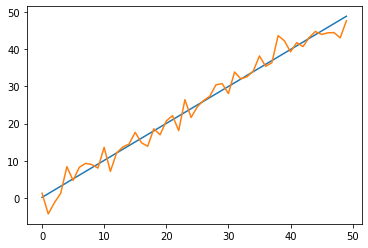

In [42]:
# Write your code here ----------
X, y = load_data_LR()
W = train_by_algebra(X, y)
X_b = np.c_[np.ones((len(X),1)), X]
y_pred = np.dot(X_b, W)
error = MSE(y, y_pred)
print(error)
plt.plot(y_pred)
plt.plot(y)
  
# -------------------------------

##### Learn **W** using gradient descent method for following learning rates, `lr = [0.01, 0.001, 0.0001]` for **10 epochs**. Plot **MSE vs epochs** for each of them.  Also plot y_pred and y on different plots.

[318.86351053]
[265.55732118]
[221.26771198]
[184.46942457]
[153.89521623]
[128.49221344]
[107.38564879]
[89.84873219]
[75.27761874]
[63.1706111]


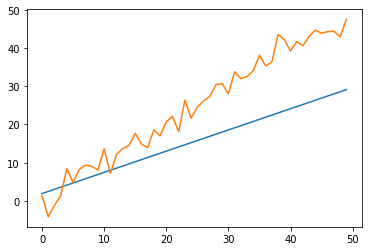

In [43]:
# Write your code here ----------
X, y = load_data_LR()
W , error_hist = train_by_GD(X, y, 10, 0.01)
X_b = np.c_[np.ones((len(X),1)), X]
y_pred = np.dot(X_b, W)
plt.plot(y_pred)
plt.plot(y)
  
# -------------------------------

[358.3607122]
[352.11491403]
[345.97916365]
[339.95152192]
[334.03008386]
[328.21297804]
[322.49836603]
[316.88444179]
[311.36943109]
[305.95159099]


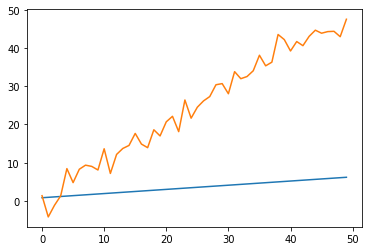

In [44]:
W , error_hist = train_by_GD(X, y, 10, 0.001)
y_pred = np.dot(X_b, W)
plt.plot(y_pred)
plt.plot(y)

[289.13634669]
[288.63063426]
[288.12581646]
[287.62189172]
[287.11885846]
[286.61671509]
[286.11546004]
[285.61509175]
[285.11560864]
[284.61700915]


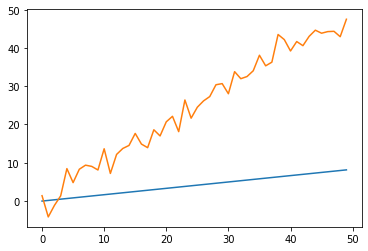

In [46]:
W , error_hist = train_by_GD(X, y, 10, 0.0001)
y_pred = np.dot(X_b, W)
plt.plot(y_pred)
plt.plot(y)

## Question 2: Image Classification in Tensorflow using Deep Learning
To check whether you are able to build a given neural network model in tensorflow or not. First we will build a fully connected NN model second we will build a CNN model.

In [53]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [56]:
def plot_history(history):
  # function to plot accuracy vs epoch

  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')

In [55]:
def load_data_cifar10_norm():
  # should return the normalised cifar10 dataset by loading it from tensorflow
  # link: https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/

  # Write your code here ----------
  (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
  x_train = x_train/255.0
  x_test = x_test/255.0
  # -------------------------------

  return x_train, y_train, x_test, y_test

### Define a fully connected neural network model with following attributes:

*   Total number of **hidden layers = 4**, all with **relu** activation
*   Number of neurons in **first hidden layer = 7200**
*   Number of neurons in **second hidden layer = 2304**
*   Number of neurons in **third hidden layer = 1024**
*   Number of neurons in **fourth hidden layer = 64**


In [57]:
def build_fc_model(input_shape=(32, 32, 3), num_class=10):
  # should return a sequential model defined based on the above attributes
  # do not compile the model

  # Write your code here ----------
  model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), tf.keras.layers.Dense(7200, activation = tf.nn.relu), tf.keras.layers.Dense(2304, activation = tf.nn.relu), tf.keras.layers.Dense(1024, activation = tf.nn.relu), tf.keras.layers.Dense(64, activation = tf.nn.relu), tf.keras.layers.Dense(10, activation = tf.nn.softmax) ])

  # -------------------------------

  return model

### Define a CNN model with following attribute:

*   Total number of **hidden layer = 4**
*   After every convolutional layer there must be a MaxPoolingLayer of size (2, 2)
*   Total number of convolutional layer = 3, all with **relu** activation.
    *    Number of filters in **first convolutional layer = 32**
    *    Number of filters in **second convolutional layer = 64**
    *    Number of filters in **third convolutional layer = 64**
*   After all convolutional layer flatten the output and use **dense layer of 64 neurons**



In [58]:
def build_cnn_model(inp_shape=(32, 32, 3), num_class=10):
  # should return a sequential model defined based on the above attributes
  # do not compile the model

  # Write your code here ----------
   
   model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64,activation='relu'),
                                    tf.keras.layers.Dense(10,activation='softmax')])
  # -------------------------------
   return model

### Compile and train the fully connected neural network model using the above functions.

Epoch 1/10
98/98 [==============================] - 211s 2s/step - loss: 2.8096 - accuracy: 0.1238 - val_loss: 2.2349 - val_accuracy: 0.1386
Epoch 2/10
98/98 [==============================] - 209s 2s/step - loss: 2.1952 - accuracy: 0.1588 - val_loss: 2.1553 - val_accuracy: 0.1919
Epoch 3/10
98/98 [==============================] - 209s 2s/step - loss: 2.0816 - accuracy: 0.2099 - val_loss: 2.0342 - val_accuracy: 0.2295
Epoch 4/10
98/98 [==============================] - 209s 2s/step - loss: 1.9287 - accuracy: 0.2667 - val_loss: 1.8223 - val_accuracy: 0.3285
Epoch 5/10
98/98 [==============================] - 209s 2s/step - loss: 1.7630 - accuracy: 0.3579 - val_loss: 1.7058 - val_accuracy: 0.3817
Epoch 6/10
98/98 [==============================] - 207s 2s/step - loss: 1.6465 - accuracy: 0.4069 - val_loss: 1.6295 - val_accuracy: 0.4111
Epoch 7/10
98/98 [==============================] - 208s 2s/step - loss: 1.5799 - accuracy: 0.4349 - val_loss: 1.5533 - val_accuracy: 0.4470
Epoch 8/10
98

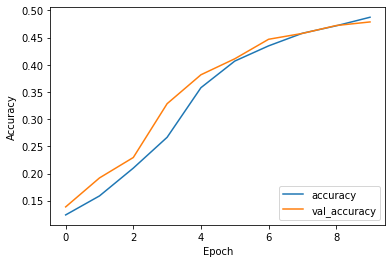

In [59]:
# Write your code here ----------
x_train, y_train, x_test, y_test = load_data_cifar10_norm()
model = build_fc_model()
model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'sparse_categorical_crossentropy', metrics  = ['accuracy'])
# -------------------------------
history = model.fit(x_train, y_train, epochs=10, batch_size=512, validation_data=(x_test, y_test))
plot_history(history)
model.summary()

### Compile and train the CNN model using the above functions.

Epoch 1/10
98/98 [==============================] - 58s 586ms/step - loss: 1.9211 - accuracy: 0.3034 - val_loss: 1.6616 - val_accuracy: 0.3965
Epoch 2/10
98/98 [==============================] - 58s 588ms/step - loss: 1.5693 - accuracy: 0.4312 - val_loss: 1.5500 - val_accuracy: 0.4438
Epoch 3/10
98/98 [==============================] - 58s 587ms/step - loss: 1.4396 - accuracy: 0.4790 - val_loss: 1.4093 - val_accuracy: 0.4947
Epoch 4/10
98/98 [==============================] - 58s 588ms/step - loss: 1.3491 - accuracy: 0.5175 - val_loss: 1.3395 - val_accuracy: 0.5173
Epoch 5/10
98/98 [==============================] - 58s 588ms/step - loss: 1.2844 - accuracy: 0.5413 - val_loss: 1.2773 - val_accuracy: 0.5449
Epoch 6/10
98/98 [==============================] - 58s 588ms/step - loss: 1.2308 - accuracy: 0.5624 - val_loss: 1.2212 - val_accuracy: 0.5671
Epoch 7/10
98/98 [==============================] - 58s 587ms/step - loss: 1.1785 - accuracy: 0.5832 - val_loss: 1.1776 - val_accuracy: 0.5845

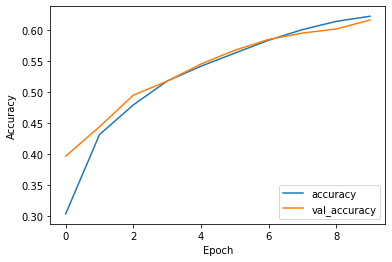

In [60]:
# Write your code here ----------
x_train, y_train, x_test, y_test = load_data_cifar10_norm()
model = build_cnn_model()
model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

# -------------------------------

history = model.fit(x_train, y_train, epochs=10, batch_size=512,validation_data=(x_test, y_test))
plot_history(history)
model.summary()

### What do you observe? Compare both the model by looking at their Accuracy vs Epoch plot and total numbers of trainable parameters.

In [61]:
print("For a particular no. of epochs the CNN model has a better fit as compared to the Earlier Neural Network and also takes significantly less time to fit")

For a particular no. of epochs the CNN model has a better fit as compared to the Earlier Neural Network and also takes significantly less time to fit
